# Introduction to statistic: Exploratory Data Analysis

In [2]:
import scipy.stats as sta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data =  pd.read_csv('state_crime.csv')
data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [10]:
# Print unique states
states = data["State"].unique()
print("States inlude in the analysis states \n", states)

# filtering data to work only with year 2019
new_data = data[(data["Year"]==2019)]
print("Number of rows and number of columns: ({},{}) \n".format(new_data.shape[0],new_data.shape[1]))

# Printing the data in the new data 
new_data.head()

States inlude in the analysis states 
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Number of rows and number of columns: (52,21) 



,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
59,Alabama,2019,4903185,2674.4,531.9,1886.1,256.5,510.8,381.0,7.3,...,80.4,131133,26079,92477,12577,25046,18679,358,2068,3941
119,Alaska,2019,731545,2910.8,487.1,2066.0,357.7,867.1,596.0,9.4,...,112.9,21294,3563,15114,2617,6343,4360,69,1088,826
179,Arizona,2019,7278717,2440.5,394.3,1796.9,249.4,455.3,311.9,5.0,...,88.1,177638,28699,130788,18151,33141,22704,365,3662,6410
239,Arkansas,2019,3017804,2858.0,599.6,2012.6,245.9,584.6,447.8,8.0,...,51.6,86250,18095,60735,7420,17643,13513,242,2331,1557
299,California,2019,39512223,2331.2,386.1,1586.3,358.8,441.2,267.1,4.3,...,132.4,921114,152555,626802,141757,174331,105541,1690,14799,52301


<center>Computing the mean, trimmed mean, weighted mean, and median<center>

In [14]:
print("The mean for rate of Violent Assault {0:.5}".format(new_data["Data.Rates.Violent.Assault"].mean()))

trim_m = sta.trim_mean(new_data["Data.Rates.Violent.Assault"],0.10)
print("The trimmed mean of Rates of Violent Assault {0:.5}".format(trim_m))

weighted_mean = np.average(new_data["Data.Rates.Violent.Assault"],weights=new_data["Data.Population"])
print("The weighted means of Rates of Violent Assault {0:.5}".format(weighted_mean))

# Let compute the median
median_rva = new_data["Data.Rates.Violent.Assault"].median()
print("The median of Rates of Violent Assault {0:.5}".format(median_rva))

The mean for rate of Violent Assault 257.07
The trimmed mean of Rates of Violent Assault 241.04
The weighted means of Rates of Violent Assault 250.19
The median of Rates of Violent Assault 247.7


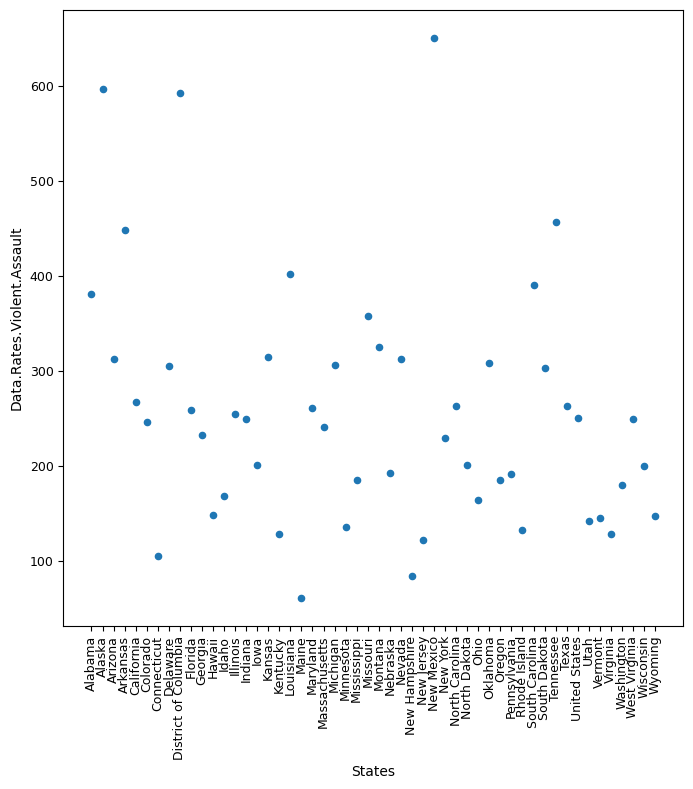

In [16]:
# Visualizing the data
new_data.plot(x="State",y="Data.Rates.Violent.Assault",kind='scatter',figsize=(8,8),rot=90,xlabel="States", fontsize=9,)
plt.savefig('scatter_plot',dpi=100)